In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statsmodels.formula.api import ols
from sklearn.model_selection import KFold
import warnings
#Importing all the libraries

# <b><center>Breast Cancer DataSet</b></center>

In [2]:
df = pd.read_csv('breast cancer data.csv')
df.head(15)
#reading the data set breast cancer data.CSV
#bringing in the first 15 rows to see if the data has been uploaded

#Diagnosis (M = malignant, B = benign)

#There are two main classifications of tumors. One is known as benign and the other as malignant.

#A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body.
#A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [3]:
from IPython.display import HTML
HTML(df.to_html())
print(df.shape)
print(df.dtypes)
df.head(n=15) 
#There are 569 records and 32 attributes
#gives us info on what the type is

(569, 32)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


# <b><center>Data Cleaning</b></center>

In [4]:
# Remove unnecessary columns
df.drop(['id'], axis=1, inplace=True)

# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "diagnosis": {}'.format(df['diagnosis'].unique()))


Missing values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Number of duplicated records: 0

Unique values of "diagnosis": ['M' 'B'

## <b><center>Malignant Vs. Benign</b></center>

In [5]:
total = df['diagnosis'].count()
malignant = df[df['diagnosis'] == "M"]['diagnosis'].count()
print("Malignant: ", malignant)
print("Benign: ", total - malignant)
#doing a count on Malingnant vs Benign

Malignant:  212
Benign:  357


In [6]:
# Generate statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


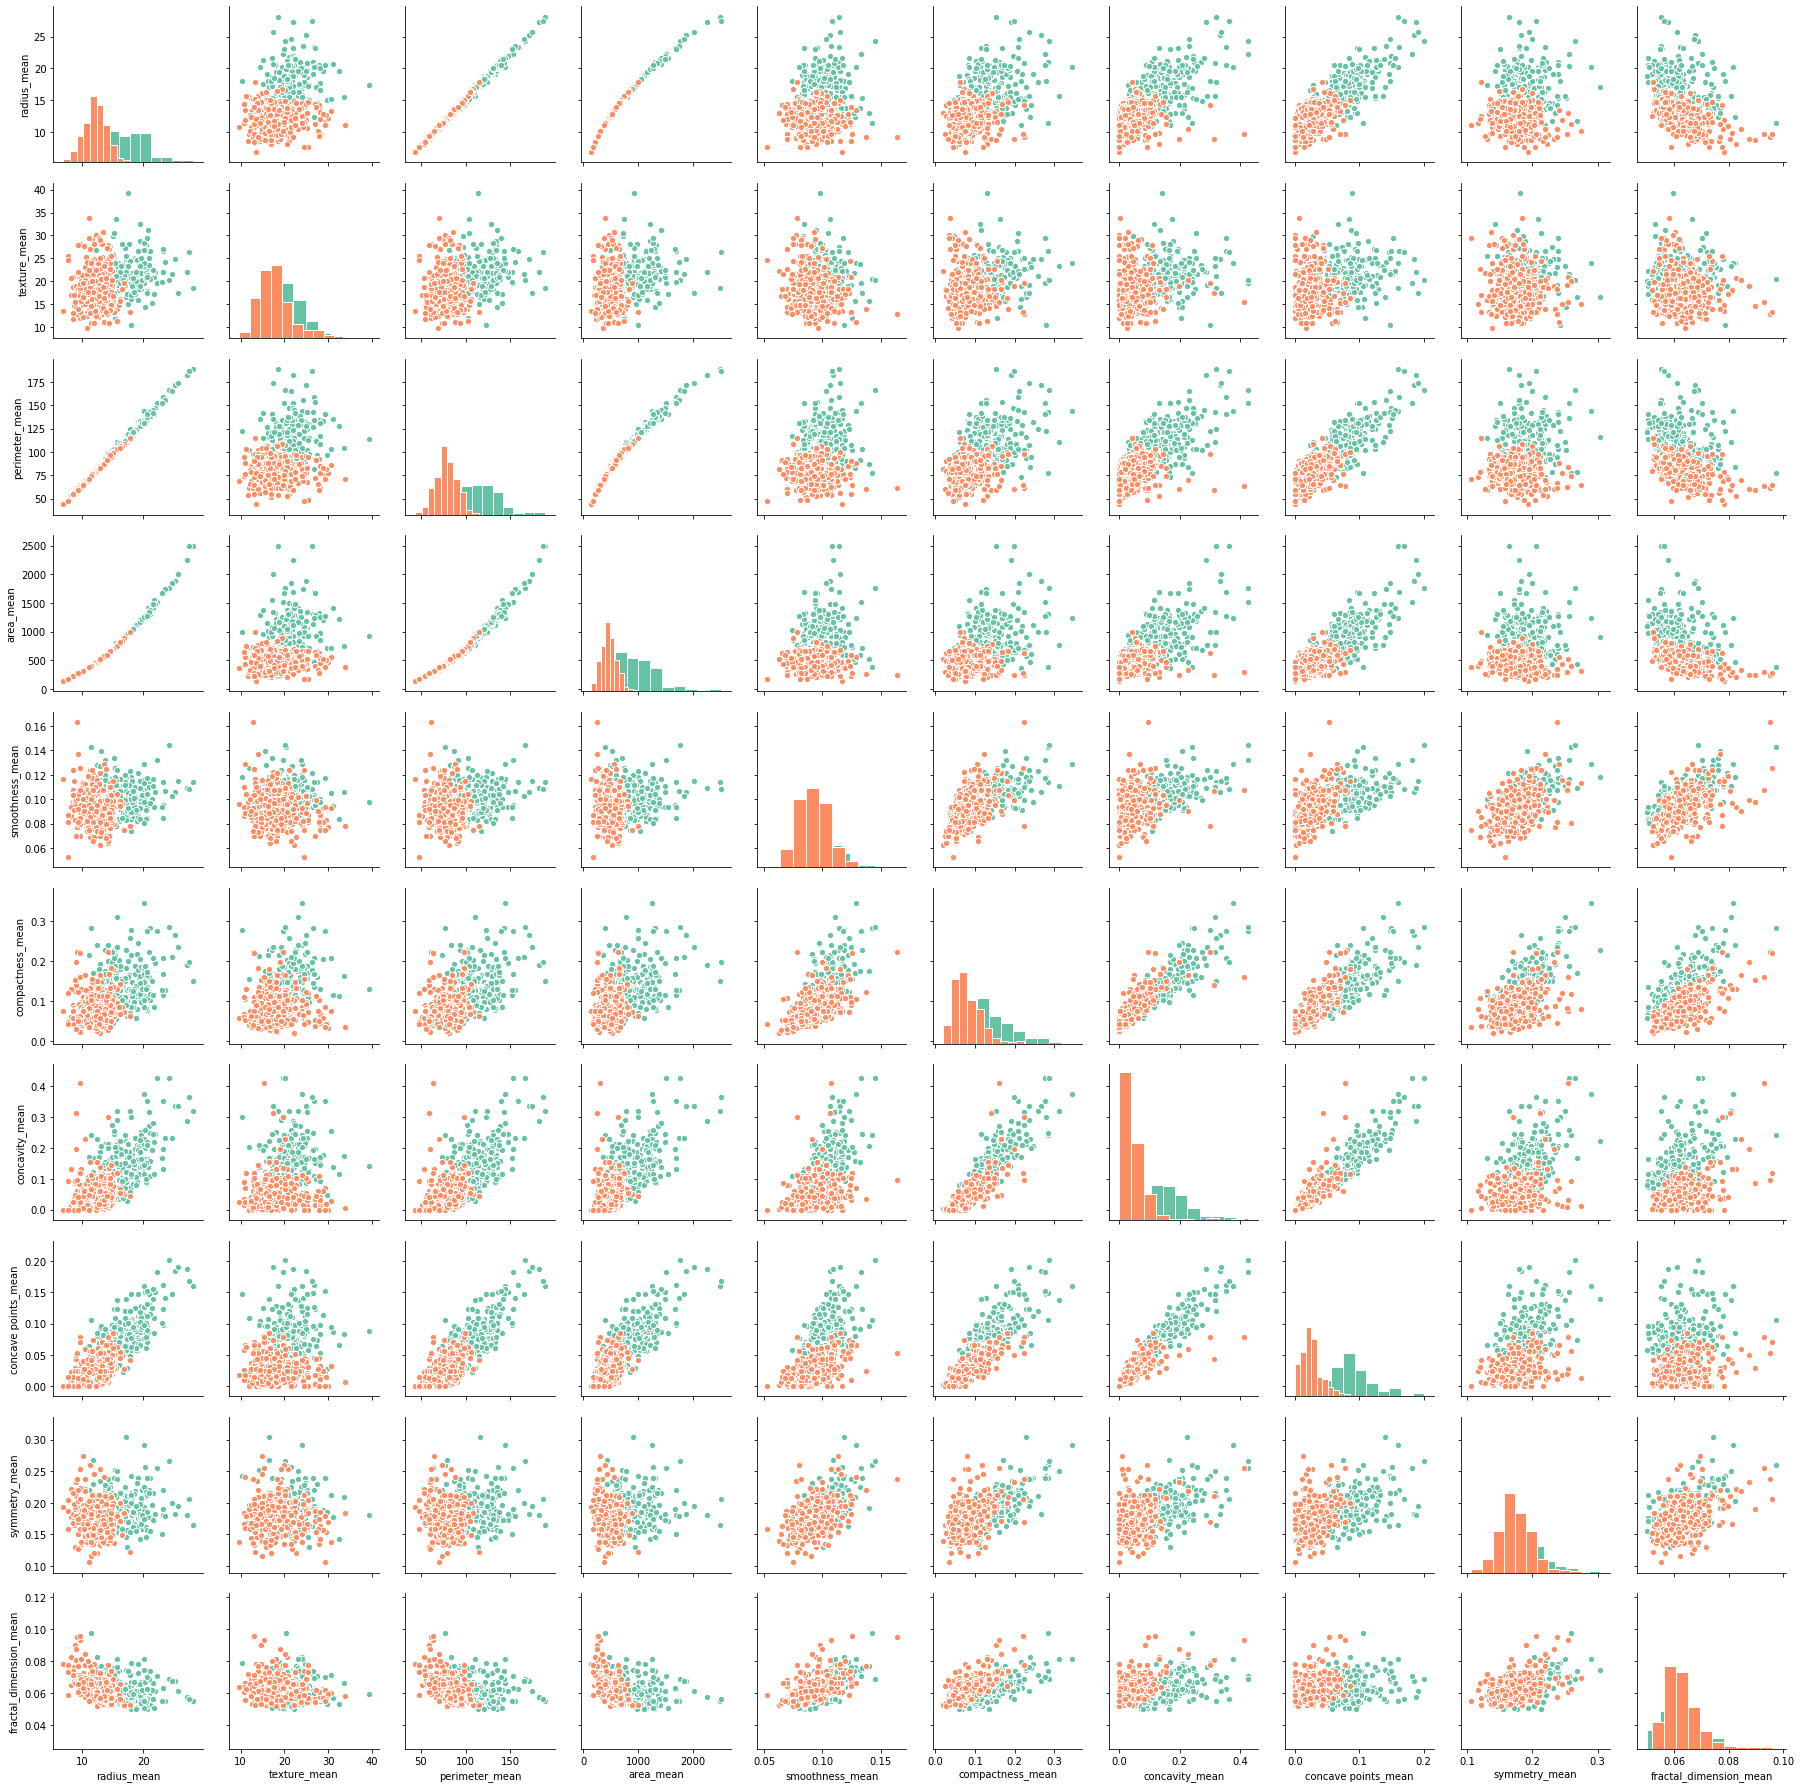

In [7]:
#Plot pairwise relationships to check the correlations between the mean features.
#Looking at the correlations between all the variables based on the 2 diagnosis shown below
#in 2 different colors
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.PairGrid(df.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.show()
#over all, our analysis confirms that there is a strong relationship between the mean varibales 
#and the diagnosis

<b>Next, a heatmap will be used to present the numerical correlations.
The univariate distributions on the diagonal show a separation of malignant and benign cells for several mean features. 
Malignant cells tend to have larger mean values of: 
    (radius -
    perimeter -
    area -
    compactness -
    concavity -
    concave points)</b>

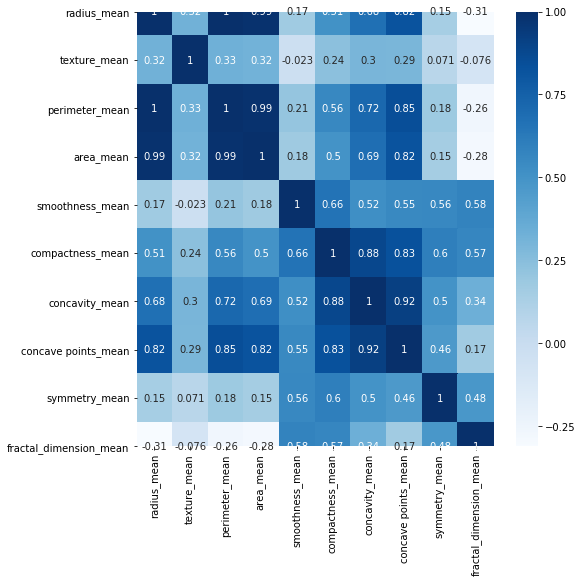

In [8]:
df_corr = df.iloc[:, 1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()
#There is strong correlations between radius, perimeter and area, Compactness, 
#concavity and concave points are also highly correlated.
#Given these variables, they have such high correlations that this could cause multi-collinearity and cause 
#problems fitting the model.

In [9]:
#Encode “diagnosis” to numerical values
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [10]:
#Machine Learning
#Split Data to Train/Test Sets
#Provided that the dataset is fairly large, we decided to test 30% of our dataset.

from sklearn.model_selection import train_test_split

array = df.values

# Define the independent variables as features.
features = array[:,1:]

# Define the target (dependent) variable as labels.
labels = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Check the split printing the shape of each set.
print(features_train.shape, labels_train.shape)
print(features_test.shape, labels_test.shape)

(398, 30) (398,)
(171, 30) (171,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier. #Looking at the closest neighbor - We chose K-NN since its fast
    clf = KNeighborsClassifier()

    # Fit the classifier on the training features and labels.
    t0 = time()
    clf.fit(features_train, labels_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = clf.predict(features_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = clf.score(features_test, labels_test)
    report = classification_report(labels_test, predictions)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(labels_test, predictions))

print_ml_results()
#We have a high 95% accuracy

Training time: 0.002 s
Prediction time: 0.01 s

Report:

Accuracy: 0.9590643274853801

               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       108
         1.0       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

[[107   1]
 [  6  57]]


In [12]:
#Remove Highly Correlated Features and Run Again
df_new = df[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
            'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'smoothness_se',
            'compactness_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'concavity_worst', 'symmetry_worst',
            'fractal_dimension_worst']]

array = df_new.values

# Define the independent variables as features.
features_new = array[:,1:]

# Define the target (dependent) variable as labels.
labels_new = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new, \
                                                                            test_size=0.3, random_state=42)

print_ml_results()

Training time: 0.0 s
Prediction time: 0.008 s

Report:

Accuracy: 0.9005847953216374

               precision    recall  f1-score   support

         0.0       0.88      0.97      0.93       108
         1.0       0.94      0.78      0.85        63

    accuracy                           0.90       171
   macro avg       0.91      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171

[[105   3]
 [ 14  49]]


In [13]:
#Scale Features. Making sure that our dataset is normalized (format). We want everything in the same unit
from sklearn.preprocessing import MinMaxScaler
import numpy as np

np.set_printoptions(precision=2, suppress=True)

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)
print("Unscaled data\n", features_train)
print("\nScaled data\n", features_scaled)

Unscaled data
 [[13.74 17.91  0.08 ...  0.16  0.23  0.07]
 [13.37 16.39  0.07 ...  0.33  0.2   0.08]
 [14.69 13.98  0.1  ...  0.32  0.28  0.09]
 ...
 [14.29 16.82  0.06 ...  0.04  0.25  0.06]
 [13.98 19.62  0.11 ...  0.41  0.32  0.11]
 [12.18 20.52  0.08 ...  0.11  0.27  0.07]]

Scaled data
 [[0.52 0.02 0.55 ... 0.91 0.6  0.42]
 [0.64 0.27 0.62 ... 0.64 0.23 0.22]
 [0.6  0.39 0.6  ... 0.84 0.4  0.21]
 ...
 [0.46 0.62 0.45 ... 0.49 0.13 0.15]
 [0.64 0.66 0.67 ... 0.91 0.5  0.45]
 [0.04 0.5  0.03 ... 0.   0.26 0.1 ]]


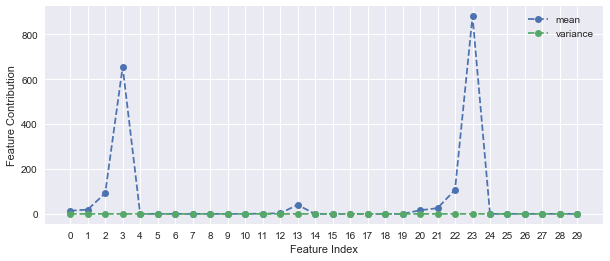

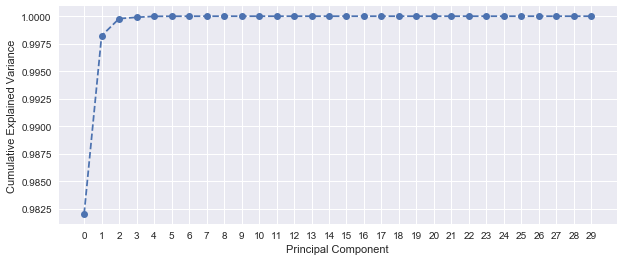

In [14]:
#Principal Component Analysis (PCA) 
#orthogonal components that explain a maximum amount of the variance.
#Due to the size of our dataset, we are applying PCA to reduce complexity of the data

from sklearn.decomposition import PCA

pca = PCA(30)
projected = pca.fit_transform(features)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()

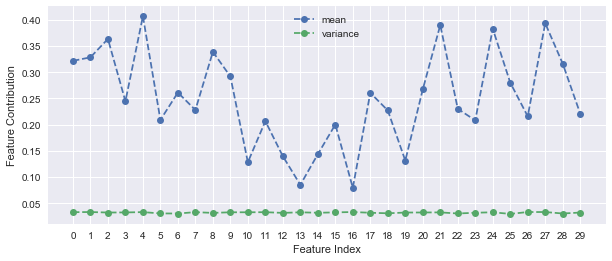

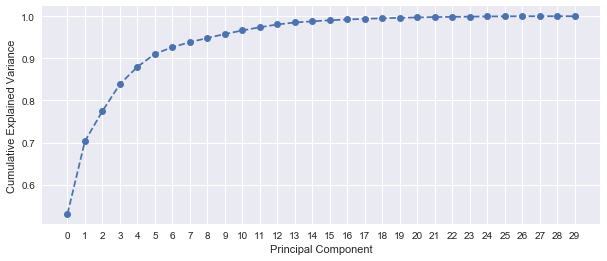

In [15]:
#scaling data to normalize due to the fact that previous graph is too good to be true
projected_scaled = pca.fit_transform(features_scaled)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plot_pca()

In [16]:
#selcting the best features based on univariate statistical test (pre-processing step)
from sklearn.feature_selection import SelectKBest

select = SelectKBest()
select.fit(features_train, labels_train)
scores = select.scores_
# Show the scores in a table
feature_scores = zip(df.columns.values.tolist(), scores)
ordered_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)
for feature, score in ordered_feature_scores:
    print(feature, score)

diagnosis 409.3245864912662
perimeter_se 330.7050300683694
perimeter_mean 203.2758586734192
compactness_mean 167.44253743713736
area_se 91.79322921512899
radius_mean 78.2141419937648
fractal_dimension_mean 73.09643056193268
texture_mean 57.90404620766715
area_mean 55.681562946633825
smoothness_se 36.50314001308628
symmetry_mean 31.544286977341688
texture_se 1.4361083876527194
concave points_mean 0.9635532721036408
radius_se 0.4417999169150616
smoothness_mean 0.40799708167262283
concavity_mean 0.18130626842704337


In [17]:
#using pipeline to help automate the machine learning workflow and to provide the best set of predictions and parameters.
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Create the scaler.
scaler = MinMaxScaler(feature_range=(0,1))

# Scale down all the features (both train and test dataset).
features = scaler.fit_transform(features)

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create the classifier.
clf = KNeighborsClassifier()

# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA()),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

# Create a function to find the best estimator.
def get_best_estimator(n_splits):

    t0 = time()

    # Create Stratified ShuffleSplit cross-validator.
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=3)

    # Create grid search.
    grid = GridSearchCV(pipeline, param_grid=parameters, scoring=('f1'), cv=sss, refit='f1')

    # Fit pipeline on features_train and labels_train.
    grid.fit(features_train, labels_train)

    # Make predictions.
    predictions = grid.predict(features_test)

    # Test predictions using sklearn.classification_report().
    report = classification_report(labels_test, predictions)

    # Find the best parameters and scores.
    best_parameters = grid.best_params_
    best_score = grid.best_score_

    # Print the reports.
    print("\nReport:\n")
    print(report)
    print("Best f1-score:")
    print(best_score)
    print("Best parameters:")
    print(best_parameters)
    print(confusion_matrix(labels_test, predictions))
    print("Time passed: ", round(time() - t0, 3), "s")
    
    return grid.best_estimator_

get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       108
         1.0       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Best f1-score:
0.943663253206249
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 6, 'reduce_dim': PCA(copy=True, iterated_power=7, n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 5}
[[106   2]
 [  3  60]]
Time passed:  32.504 s


Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power=7, n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=6, p=2,
                                      weights='uniform'))],
         verbose=False)

In [18]:
#combine serveral methods to obtain good performance.
# Build the estimator from PCA and univariate selection.
combined_features = FeatureUnion([('pca', PCA()), ('univ_select', SelectKBest())])

# Do grid search over k, n_components and K-NN parameters.
pipeline = Pipeline([('features', combined_features),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'features__pca': [PCA(iterated_power=7)],
        'features__pca__n_components': n_features_options,
        'features__univ_select__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

get_best_estimator(20)


Report:

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       108
         1.0       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Best f1-score:
0.9490374678040226
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 6, 'features__pca': PCA(copy=True, iterated_power=7, n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'features__pca__n_components': 5, 'features__univ_select__k': 3}
[[107   1]
 [  4  59]]
Time passed:  92.752 s


Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('pca',
                                                 PCA(copy=True,
                                                     iterated_power=7,
                                                     n_components=5,
                                                     random_state=None,
                                                     svd_solver='auto', tol=0.0,
                                                     whiten=False)),
                                                ('univ_select',
                                                 SelectKBest(k=3,
                                                             score_func=<function f_classif at 0x000001FA683C2678>))],
                              transformer_weights=None, verbose=False)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
        

In [ ]:
In this study, K-NN algorithm was applied for the diagnosis of the Breast Cancer Wisconsin DataSet. It was found that precision and recall scores can be considerably improved applying the following steps:

Feature Scaling

Dimensionality Reduction

Cross Validation

Hyperparameter Optimization

For better results more data are required and other algorithms should be used.